In [1]:
import numpy as np
import pandas as pd

 #### IPython基础

### 1.魔术命令(见列表）

IPython中特殊的命令（Python中没有）被称作“魔术”命令。这些命令可以使普通任务更便捷，更容易控制IPython系统。魔术命令是在指令前添加百分号%前缀。例如，可以用`%timeit`（这个命令后面会详谈）测量任何Python语句，例如矩阵乘法，的执行时间：

In [3]:
a = np.random.randn(100, 100)
%timeit np.dot(a, a)

33.6 µs ± 703 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


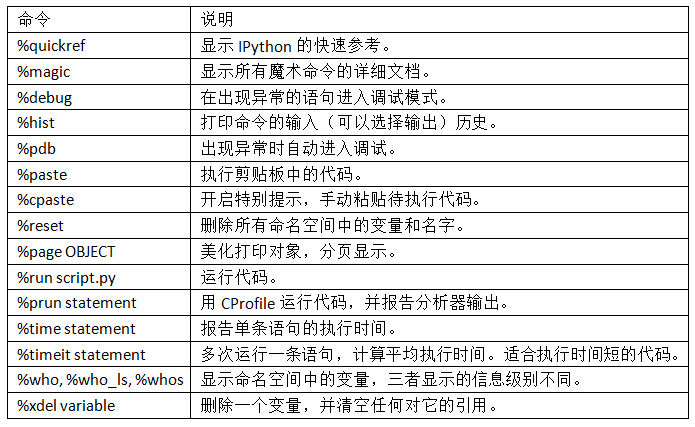

In [4]:
%who

a	 np	 pd	 


### 2.Python语法基础

#### 2.1属性和方法

Python的对象通常都有属性（其它存储在对象内部的Python对象）和方法（对象的附属函数可以访问对象的内部数据）。可以用`obj.attribute_name`访问属性和方法：

In [5]:
a = 'foo'
a.count 

<function str.count>

In [6]:
a.split

<function str.split(sep=None, maxsplit=-1)>

#### 2.2 引入

在Python中，模块就是一个有`.py`扩展名、包含Python代码的文件。假设有以下模块：

In [4]:
# some_module.py（系统内部模块mac中已在本地建了1个）
PI = 3.14159
def f(x):
    return x + 5
def g(a, b):
    return a + b

如果想从同目录下的另一个文件访问`some_module.py`中定义的变量和函数，可以：

In [6]:
import some_module
result = some_module.f(5)
print(result)

10


或者：

In [7]:
from some_module import f, g, PI
result = g(5, PI)
print(result)

8.14159


使用`as`关键词，你可以给引入起不同的变量名：

In [24]:
import some_module as sm
from some_module import PI as pi, g as gf
r1 = sm.f(pi)
r2 = gf(6, pi)
print(r1)
print(r2)

5.14159
9.14159


#### #建立自己的模块（some_mok.py）

In [2]:
# some_mok.py (这些代码要做python下专门新建一个some_mok.py文件并放在当前文件夹下才能调用)
def f(x):
    return x + 10
def g(a, b):
    return a + b

In [2]:
#调用自己的模块
import some_mok
result = some_mok.f(5)
print(result)

15


#### 2.2二元运算符和比较运算符
大多数二元数学运算和比较都不难想到（见列表）

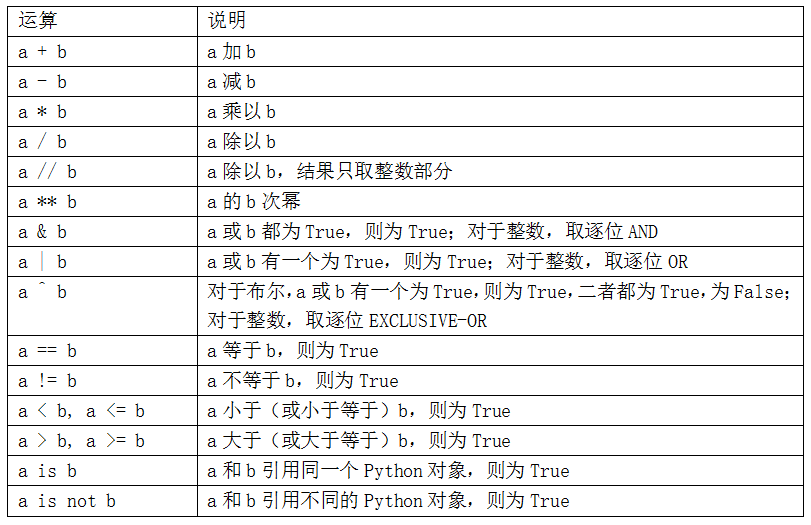


`is`和`is not`常用来判断一个变量是否为`None`，因为只有一个`None`的实例：

In [26]:
a = None
a is None

True

#### 2.3标量类型
Python的标准库中有一些内建的类型，用于处理数值数据、字符串、布尔值，和日期时间。这些单值类型被称为标量类型，本书中称其为标量。表2-4列出了主要的标量。日期和时间处理会另外讨论，因为它们是标准库的`datetime`模块提供的。
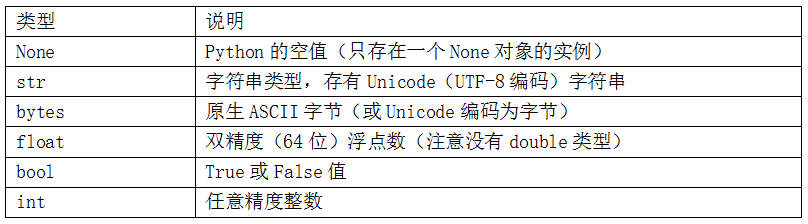

#### 2.3.1数值类型
Python的主要数值类型是`int`和`float`。`int`可以存储任意大的数：

In [27]:
ival = 17239871
ival ** 6

26254519291092456596965462913230729701102721

In [28]:
#不能得到整数的除法会得到浮点数：
3 / 2

1.5

In [29]:
#要获得C-风格的整除（去掉小数部分），可以使用底除运算符//：
3 // 2

1

#### 2.3.2字符串
#许多人是因为Python强大而灵活的字符串处理而使用Python的。你可以用单引号或双引号来写字符串：

In [30]:
a = 'one way of writing a string'
b = "another way"
print(a)

one way of writing a string


#对于有换行符的字符串，可以使用三引号，'''或"""都行：

In [31]:
c = """
This is a longer string that
spans multiple lines
it is nice
"""
print(c)


This is a longer string that
spans multiple lines
it is nice



字符串`c`实际包含5行文本，"""后面和lines后面的换行符。可以用`count`方法计算`c`中的新的行：

In [32]:
c.count('\n')

4

#Python的字符串是不可变的，不能修改字符串：

In [33]:
a = 'this is a string'

In [35]:
a[10] = 'f'

TypeError: 'str' object does not support item assignment

In [36]:
b = a.replace('string', 'longer string')
b

'this is a longer string'

经过以上的操作，变量`a`并没有被修改：

In [37]:
a

'this is a string'

#许多Python对象使用`str`函数可以被转化为字符串：

In [42]:
a = 5.6
a

5.6

In [43]:
s = str(a)
s

'5.6'

#字符串是一个序列的Unicode字符，因此可以像其它序列，比如列表和元组（下一章会详细介绍两者）一样处理：

In [44]:
s = 'python'
list(s)

['p', 'y', 't', 'h', 'o', 'n']

In [45]:
s[:3]

'pyt'

语法`s[:3]`被称作切片，适用于许多Python序列。后面会更详细的介绍，本书中用到很多切片。

#反斜杠是转义字符，意思是它备用来表示特殊字符，比如换行符\n或Unicode字符。要写一个包含反斜杠的字符串，需要进行转义：

In [48]:
s = '12\\34'
print(s)

12\34


#如果字符串中包含许多反斜杠，但没有特殊字符，这样做就很麻烦。幸好，可以在字符串前面加一个r，表明字符就是它自身：

In [49]:
s = r'this\has\no\special\characters' #r表示raw
s

'this\\has\\no\\special\\characters'

#将两个字符串合并，会产生一个新的字符串：

In [50]:
a = 'this is the first half '
b = 'and this is the second half'
a + b

'this is the first half and this is the second half'

#字符串的模板化或格式化，是另一个重要的主题。Python 3拓展了此类的方法，这里只介绍一些。字符串对象有`format`方法，可以替换格式化的参数为字符串，产生一个新的字符串：

In [51]:
template = '{0:.2f} {1:s} are worth US${2:d}'

在这个字符串中，

* `{0:.2f}`表示格式化第一个参数为带有两位小数的浮点数。
* `{1:s}`表示格式化第二个参数为字符串。
* `{2:d}`表示格式化第三个参数为一个整数。

要替换参数为这些格式化的参数，我们传递`format`方法一个序列：

In [52]:
template.format(4.5560, 'Argentine Pesos', 1)

'4.56 Argentine Pesos are worth US$1'

##### #字符串格式化是一个很深的主题，有多种方法和大量的选项，可以控制字符串中的值是如何格式化的。推荐参阅Python官方文档。

#### 2.3.3字节和Unicode
在Python 3及以上版本中，Unicode是一级的字符串类型，这样可以更一致的处理ASCII和Non-ASCII文本。在老的Python版本中，字符串都是字节，不使用Unicode编码。假如知道字符编码，可以将其转化为Unicode。看一个例子：

In [53]:
val = "español"
val

'español'

#可以用`encode`将这个Unicode字符串编码为UTF-8：

In [54]:
val_utf8 = val.encode('utf-8')
print(val_utf8)
print(type(val_utf8))

b'espa\xc3\xb1ol'
<class 'bytes'>


如果你知道一个字节对象的Unicode编码，用`decode`方法可以解码：

In [55]:
val_utf8.decode('utf-8')

'español'

虽然UTF-8编码已经变成主流，但因为历史的原因，你仍然可能碰到其它编码的数据：

In [56]:
val.encode('utf-16')

b'\xff\xfee\x00s\x00p\x00a\x00\xf1\x00o\x00l\x00'

In [57]:
val.encode('latin1')

b'espa\xf1ol'

工作中碰到的文件很多都是字节对象，盲目地将所有数据编码为Unicode是不可取的。

虽然用的不多，你可以在字节文本的前面加上一个b：

In [58]:
bytes_val = b'this is bytes'
print(bytes_val)
decoded = bytes_val.decode('utf8')
print(decoded)  # this is str (Unicode) now


b'this is bytes'
this is bytes


#### 2.3.4布尔值
Python中的布尔值有两个，True和False。比较和其它条件表达式可以用True和False判断。布尔值可以与and和or结合使用：

In [59]:
True and True

True

In [60]:
False or True

True

#### 2.3.5类型转换
str、bool、int和float也是函数，可以用来转换类型：

In [61]:
s = '3.14159'
fval = float(s)
type(fval)

float

In [62]:
int(fval)

3

In [63]:
bool(fval)

True

In [64]:
fval

3.14159

#### 2.3.6 日期和时间
Python内建的`datetime`模块提供了`datetime`、`date`和`time`类型。`datetime`类型结合了`date`和`time`，是最常使用的：

In [11]:
from datetime import datetime, date, time
dt = datetime(2011, 10, 29, 20, 30, 21)
dt.day

29

In [12]:
dt.minute

30

In [13]:
dt.date()

datetime.date(2011, 10, 29)

In [14]:
dt.time()

datetime.time(20, 30, 21)

#`strftime`方法可以将datetime格式化为字符串

In [15]:
dt.strftime('%m/%d/%Y %H:%M')

'10/29/2011 20:30'

#`strptime`可以将字符串转换成`datetime`对象：

In [16]:
datetime.strptime('20091031', '%Y%m%d')

datetime.datetime(2009, 10, 31, 0, 0)

表2-5列出了所有的格式化命令。
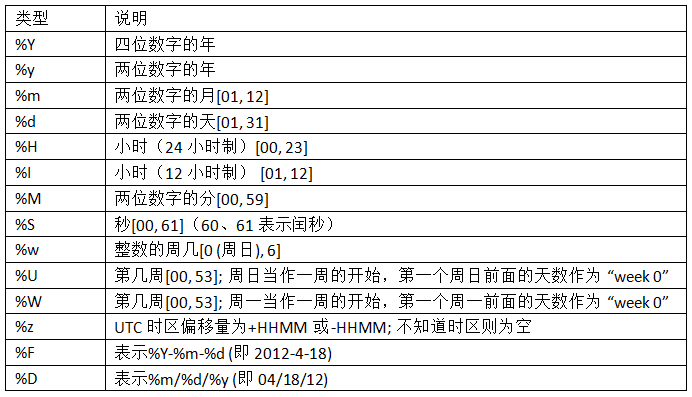

#两个datetime对象的差会产生一个`datetime.timedelta`类型：

In [19]:
dt2 = datetime(2011, 11, 15, 22, 30)
delta = dt2 - dt
delta

datetime.timedelta(days=17, seconds=7179)

In [20]:
type(delta)

datetime.timedelta

##### 提取当前时间

In [21]:
import datetime as dt1# 引入函数库
now_time = dt1.datetime.now().strftime('%F %T')# 获取当前时间
print('当前时间为：' + now_time)# 输出时间

当前时间为：2020-12-15 20:10:40


In [22]:
dt1.datetime.now().time()

datetime.time(20, 10, 41, 336968)

In [23]:
dt1.datetime.now().date()

datetime.date(2020, 12, 15)

### 3. 控制流
Python有若干内建的关键字进行条件逻辑、循环和其它控制流操作。
#### 3.1 if、elif和else
if是最广为人知的控制流语句。它检查一个条件，如果为True，就执行后面的语句：

`if`后面可以跟一个或多个`elif`，所有条件都是False时，还可以添加一个`else`：

In [31]:
if x < 0:
    print('Its negative')
elif x == 0:
    print('Equal to zero')
elif 0 < x < 5:
    print('Positive but smaller than 5')
else:
    print('Positive and larger than or equal to 5')

Positive but smaller than 5


#### 3.2While循环
while循环指定了条件和代码，当条件为False或用break退出循环，代码才会退出：

In [28]:
x = 256
total = 0
while x > 0:
    if total > 500:
        break
    total += x
    x = x // 2

In [29]:
x

4